In [1]:
#2301877590 - Felix Filipi
#Import libraries
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_digits

In [2]:
#load_digits
ds=load_digits()
attribute=ds.data #define attribute
label=ds.target #define target

In [3]:
#split training 0.8 & test 0.2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(attribute,label,test_size=0.2,random_state=42)

In [4]:
#every pixel have a value 0 to 255, so we should normalize by divide with 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
#check shape
X_train.shape

(1437, 64)

In [6]:
#flatten input should have 3 dimensions, so reshape X
X_train=X_train[:,:,np.newaxis]
X_test=X_test[:,:,np.newaxis]

In [7]:
#check shape
X_test.shape

(360, 64, 1)

In [8]:
#Build model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,1)), #input layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #output layer
])
#more than 2 target, so I use sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50) #hyperparameter

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 1437 samples
Epoch 1/50
1437/1437 [==============================] - 1s 355us/sample - loss: 2.2963 - acc: 0.1093
Epoch 2/50
1437/1437 [==============================] - 0s 104us/sample - loss: 2.2819 - acc: 0.1601
Epoch 3/50
1437/1437 [==============================] - 0s 101us/sample - loss: 2.2680 - acc: 0.3034
Epoch 4/50
1437/1437 [==============================] - 0s 105us/sample - loss: 2.2542 - acc: 0.4161
Epoch 5/50
1437/1437 [==============================] - 0s 103us/sample - loss: 2.2402 - acc: 0.5052
Epoch 6/50
1437/1437 [==============================] - 0s 101us/sample - loss: 2.2267 - acc: 0.6089
Epoch 7/50
1437/1437 [==============================] - 0s 105us/sample - loss: 2.2130 - acc: 0.6660
Epoch 8/50
1437/1437 [==============================] - 0s 101us/sample - loss: 2.1994 - acc: 0.7070
Epoch 9/50
1437/1437 [==============================] - 0s 102us/sample - loss: 2.1859 - 

In [9]:
_, accuracy = model.evaluate(X_test, y_test) #testing
print('Accuracy: %.2f%%' % (accuracy*100)) #avoid overfitting

360/360 [==============================] - 0s 167us/sample - loss: 1.7042 - acc: 0.8750
Accuracy: 87.50%


In [10]:
# make class predictions with the model
predictions = model.predict_classes(X_test)
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i], y_test[i], predictions[i]))

[[0.        ]
 [0.        ]
 [0.        ]
 [0.02745098]
 [0.04705882]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.01568627]
 [0.0627451 ]
 [0.03137255]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.04705882]
 [0.04313725]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05882353]
 [0.03921569]
 [0.03137255]
 [0.02352941]
 [0.00392157]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05882353]
 [0.0627451 ]
 [0.03137255]
 [0.03921569]
 [0.03137255]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05490196]
 [0.02745098]
 [0.        ]
 [0.        ]
 [0.04705882]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.03137255]
 [0.04313725]
 [0.        ]
 [0.01960784]
 [0.0627451 ]
 [0.00784314]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.03529412]
 [0.05490196]
 [0.05490196]
 [0.01960784]
 [0.        ]] => 6 (expected 6)
[[0.        ]
 [0.        ]
 [0.04313725]
 [0.0627451 ]
 [0.03137255]
 [0.        ]
 

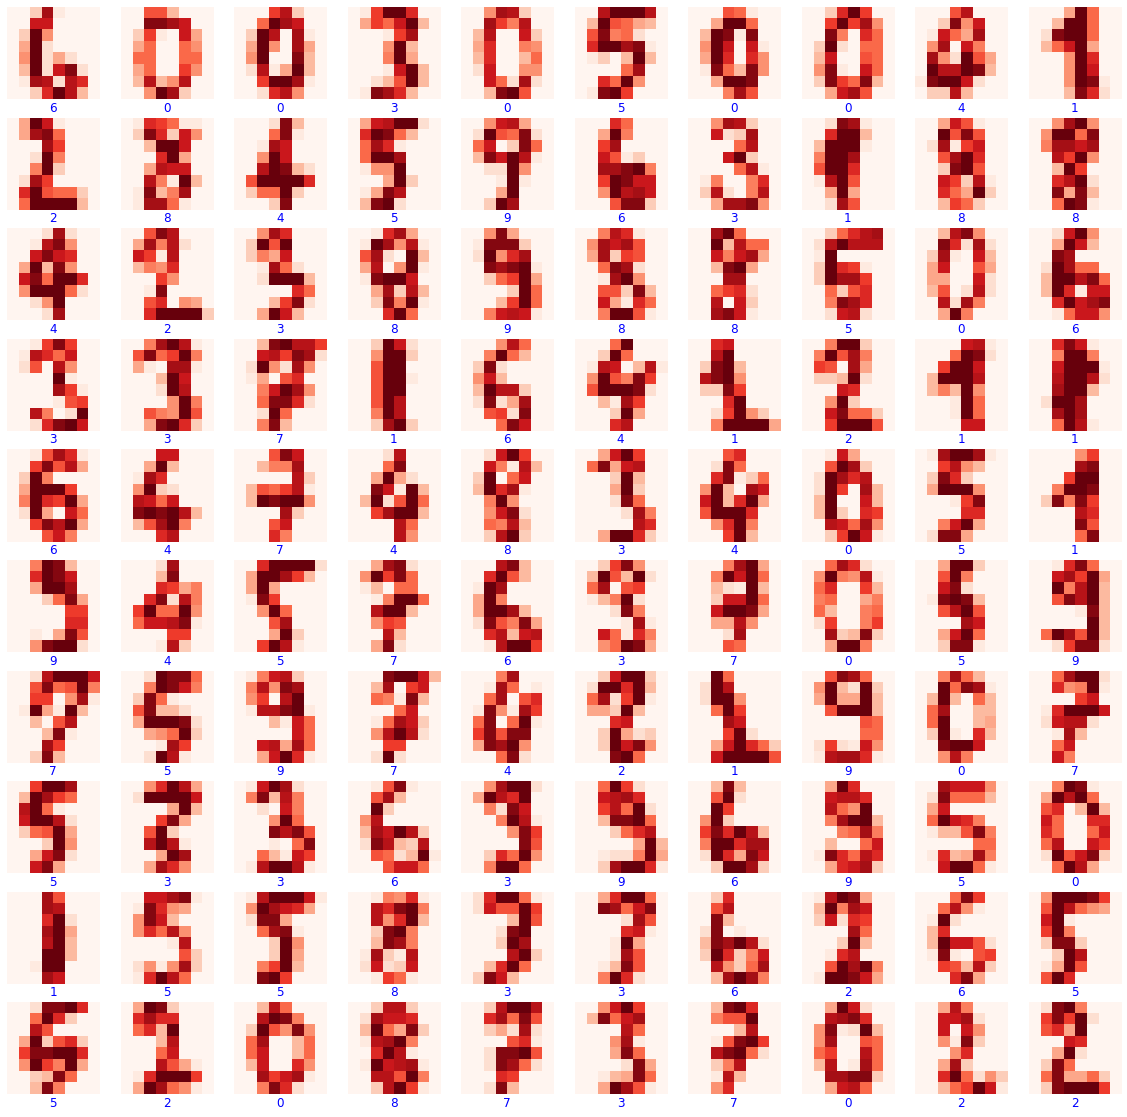

In [11]:
import matplotlib.pyplot as plt 
rows = 10 # rows in figure
cols = 10 # colums in figure

fig = plt.figure(figsize=(2*cols,2*rows)) # define figure 

for i in range(rows*cols): 
    fig.add_subplot(rows,cols,i+1) # figure on each iteration
    plt.imshow(X_train[i].reshape([8,8]),cmap="Reds") 
    plt.axis("off") 
    plt.title(str(y_train[i]), y=-0.20,color="Blue")